In [10]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Задаем матрицу переходных вероятностей - A и матрицу эмиссий - E:

In [11]:
v1 = float(1/6)
v2 = 0.1
A = np.array([[0.95, 0.05], [0.1, 0.9]], float)
E = np.array([[v1, v1, v1, v1, v1, v1], [v2, v2, v2, v2, v2, 0.5]], float)

Затем задаем длину последовательности - L и вектор стационарного распределения - s:

In [12]:
L = 500
s = np.array([2/3, 1/3])

При заданных A и E получим вектора действительных состояний - state и наблюдений - observation.
Сначала получим число от 0 до 1 и зададим нулевое состояние - satet[0], после чего найдем первое наблюдение, а затем вектор состояний и вектор наблюдений для заданной длины последовательности - L:

In [18]:
observation = np.zeros((L,),dtype=int)
state = np.zeros((L,),dtype=int)

D = np.random.random() #кость
N = np.random.random() #число

if 0 <= N < 2/3:
    state[0] = 0
else:
    state[0] = 1
    
k = 0
for i in range(6):
    k += E[state[0], i]
    if N < k:
        observation[0] = i + 1 
        break;
        
for j in range(1, L):
    D = np.random.random()
    N = np.random.random()
    k1 = 0
    k2 = 0
    for i in range(2):
        k1 += A[state[j - 1], i]
        if D < k1:
            state[j] = i
            break;
    for i in range(6):
        k2 += E[state[j], i]
        if N < k2:
            observation[j] = i + 1
            break;
            
print("Вектор наблюдений:\n", observation)
print("\nВектор состояний:\n", state)

Вектор наблюдений:
 [6 6 6 5 2 6 6 6 1 6 6 6 4 6 6 4 4 1 6 5 4 1 5 4 1 3 5 4 1 5 5 5 3 2 4 2 1
 2 4 4 2 6 1 4 3 4 5 2 4 3 5 4 1 4 2 1 2 5 1 6 5 3 6 4 6 6 3 4 4 3 3 3 5 4
 2 1 4 1 6 1 1 3 3 3 4 1 6 5 1 1 4 6 6 3 2 2 4 3 1 6 6 6 2 6 2 2 4 5 6 1 2
 1 6 2 2 1 6 4 1 1 4 5 2 5 6 1 6 3 6 5 6 2 6 6 6 4 2 2 6 6 3 1 4 2 3 2 1 5
 6 6 3 4 3 6 6 3 4 4 1 6 5 4 5 2 3 3 2 3 4 6 5 1 6 6 4 6 2 5 1 2 2 5 5 6 2
 5 6 1 3 4 4 4 4 4 6 2 4 6 3 1 2 6 4 6 1 6 6 1 6 3 1 2 5 3 4 2 4 2 3 1 3 5
 3 2 6 2 3 6 2 1 6 6 6 6 1 2 6 2 6 6 6 6 5 3 1 6 5 2 1 2 5 3 5 3 1 5 1 5 1
 3 6 1 6 5 1 3 6 3 4 5 3 4 6 4 5 1 4 6 5 3 2 6 1 3 5 3 6 3 6 5 6 6 4 1 6 4
 6 4 4 6 6 2 1 5 2 3 5 2 3 3 6 4 6 6 6 2 3 4 6 3 4 4 4 1 4 2 5 4 2 2 5 5 1
 6 6 3 5 6 1 3 2 1 2 5 6 3 5 2 6 4 5 5 5 3 1 2 2 2 6 3 6 1 3 5 4 6 3 5 4 2
 2 3 2 6 5 4 1 6 4 4 5 6 1 2 5 4 6 6 6 5 6 1 5 1 5 2 1 2 3 5 4 6 5 5 5 1 5
 3 1 4 5 1 5 5 2 5 4 2 4 4 2 3 4 1 2 3 3 1 6 6 6 4 4 2 1 6 5 4 1 5 5 6 4 3
 6 2 1 2 5 1 4 4 5 6 5 6 5 4 3 1 5 2 4 6 4 5 4 2 3 5 6 4 3 5 6 3 6 4 2 1 4
 2 2 

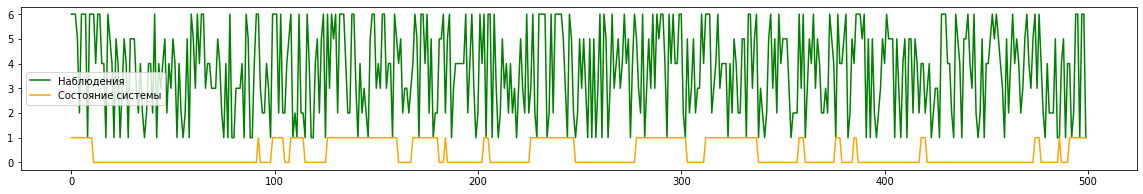

In [74]:
fig, ax = plt.subplots()
a1 = np.arange(L)
b1 = observation
a2 = np.arange(L)
b2 = state
ax.plot(a1, b1, color = "Green", label = "Наблюдения")
ax.plot(a2, b2, color = "Orange", label = "Состояние системы")
ax.legend()
fig.set_size_inches(20, 3)
plt.show()

#### Алгоритм Витерби

In [38]:
V = np.zeros((2,L))
P = np.zeros((2,L), dtype = int)
most_probable_cond = np.zeros((L,), dtype = int)

V[:,0] = s * E[:,observation[0] - 1]

for i in range(1, L):
    for j in range(2):
        V[j,i] = np.max(V[:,i - 1] * A[:,j] * E[:,observation[i] - 1])
        P[j,i] = np.argmax(V[:,i - 1] * A[:,j] * E[:,observation[i] - 1])
    V[:,i] /= np.max(V[:,i])
most_probable_cond[-1] = np.argmax(V[:,-1])
for i in range(L-2, -1, -1):
    most_probable_cond[i] = P[most_probable_cond[i + 1],i + 1]
print("Массив наиболее вероятных состояний:\n", most_probable_cond)

overlap = 0
for i in range(L):
    if state[i] == most_probable_cond[i]:
        overlap = overlap + 1
print("\nКоличество бросков = L = 500\nКоличество совпадений = ", overlap)

Массив наиболее вероятных состояний:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Алгоритм просмотра вперед

In [46]:
V2 = np.zeros((2,L))#Итоговая матрица
P2 = np.zeros((L,))#вектор нормировочных коэфициентов
V2[:,0] = s * E[:,observation[0] - 1]#нулевой столбец, где S - стационарное распределение
P2[0] = max(V2[:,0])
V2[:,0] /= P2[0]

for i in range(1,L):
    for j in range(2):
        V2[j,i] = np.sum(V2[:,i - 1] * A[:,j]) * E[j,observation[i] - 1]
    P2[i] = np.max(V2[:,i])
    V2[:,i] /= P2[i]
norm_observation_pr = np.sum(V2[:,-1])
print("Нормированная вероятность наблюдения:\n", norm_observation_pr)

Нормированная вероятность наблюдения:
 1.5807820724940431


In [49]:
#Алоритм просмотра назад
def backward(E, A, observation, L):
    bk = [[0]*(L+1), [0]*(L+1)]
    bk[0][-1] = bk[1][-1] = 1
    for i in range(L-1,-1,-1):
        bk[0][i] = (E[0][observation[i]-1]*bk[0][i+1]*A[0][0] + E[1][observation[i]-1]*bk[1][i+1]*A[0][1])
        bk[1][i] = (E[1][observation[i]-1]*bk[1][i+1]*A[1][1] + E[0][observation[i]-1]*bk[0][i+1]*A[1][0])
    bk[0][0] = bk[0][0]*(2/3)
    bk[1][0] = bk[1][0]*(1/3)
    return(bk)


bk = backward(E, A, observation, L)

#print(bk[0])
#print(bk[1])

#проверка
resb = bk[0][0] + bk[1][0]
print(resb)

0.0
